In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Exploratory Data Analysis

In [3]:
import pandas as pd
import requests
from io import BytesIO

# Define the URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the CSV file from the URL
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Read the CSV data into a DataFrame
    dataset_part_2_csv = BytesIO(response.content)
    df = pd.read_csv(dataset_part_2_csv)
    
    # Display the first 5 rows of the DataFrame
    df.head(5)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

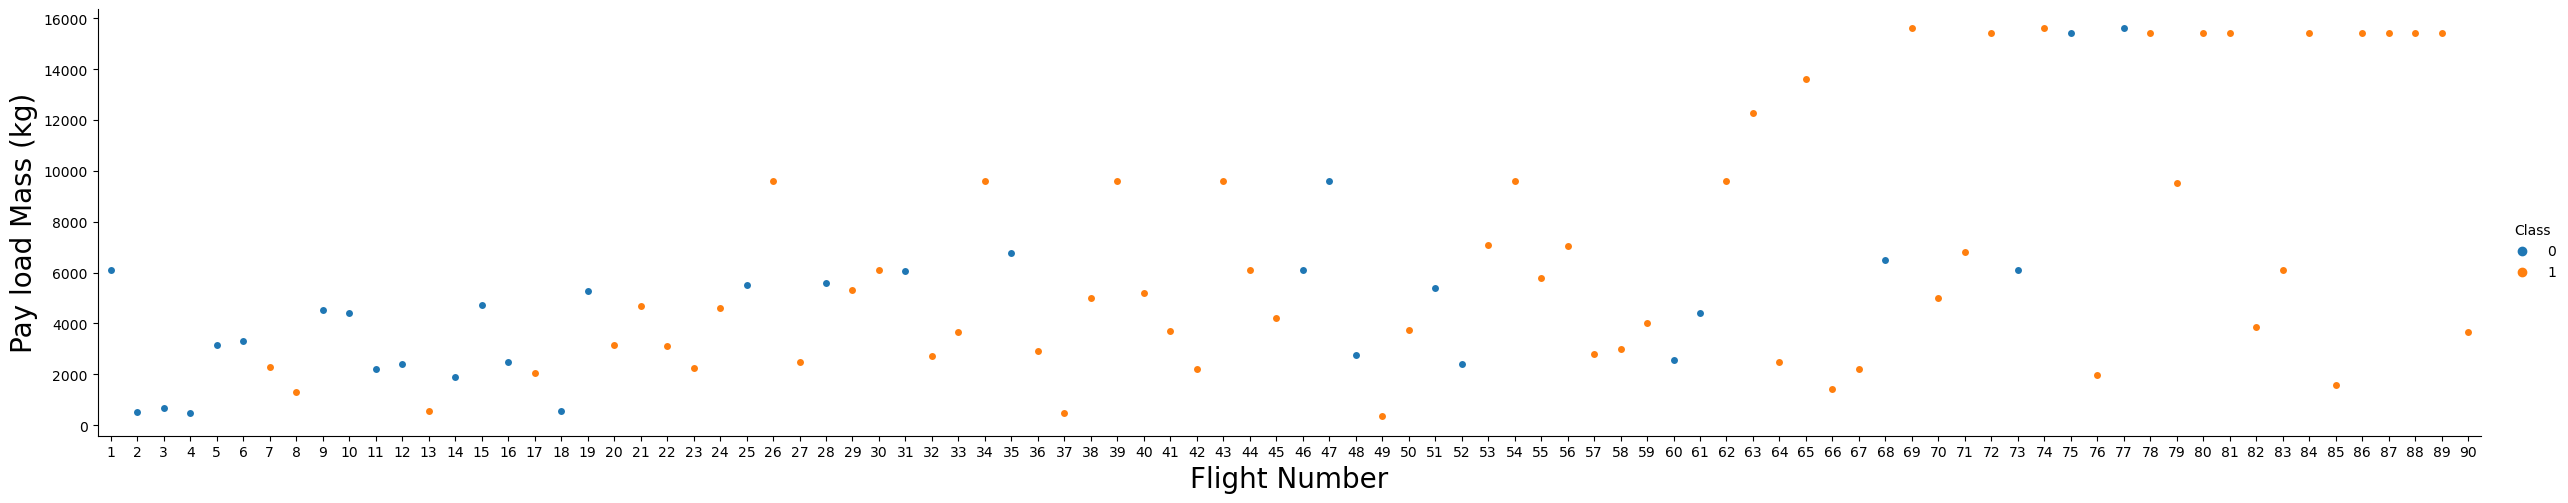

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

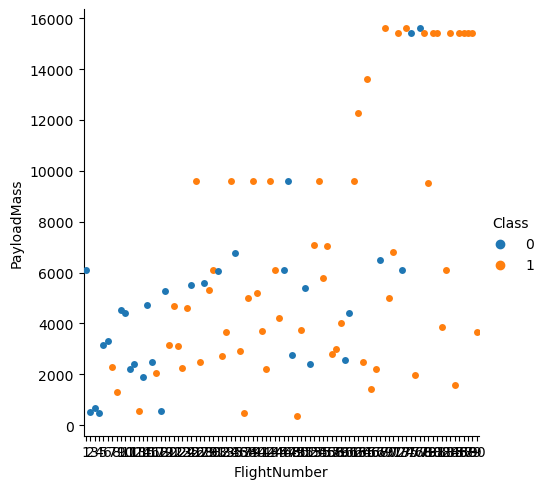

In [6]:
sns.catplot(
    x='FlightNumber',
    y='PayloadMass',
    hue="Class",
    data=df,
    kind='strip'  # You can use 'strip', 'swarm', etc., depending on your preference
)

# Display the plot
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site

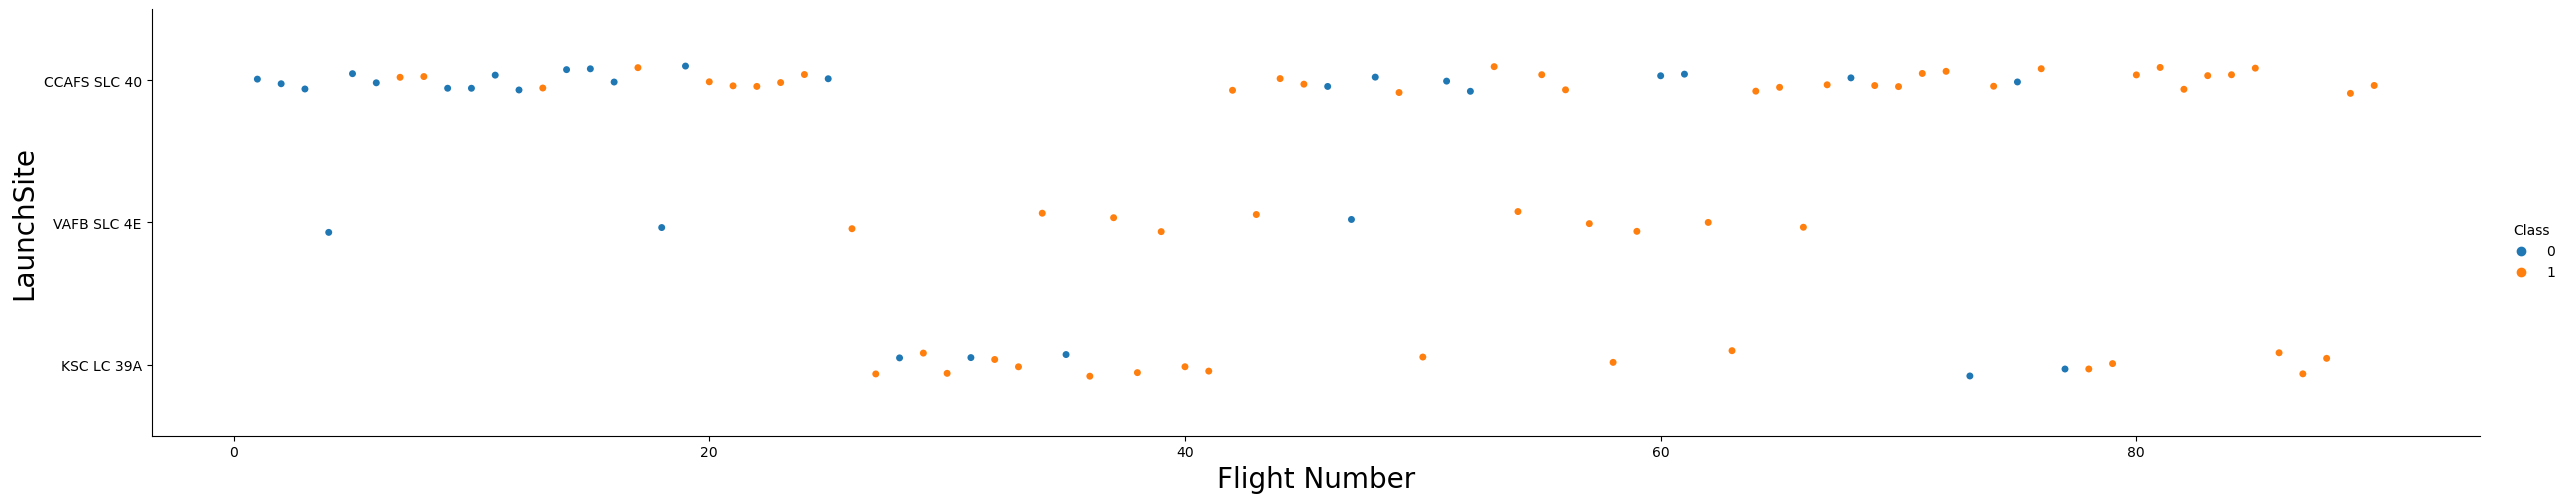

In [7]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

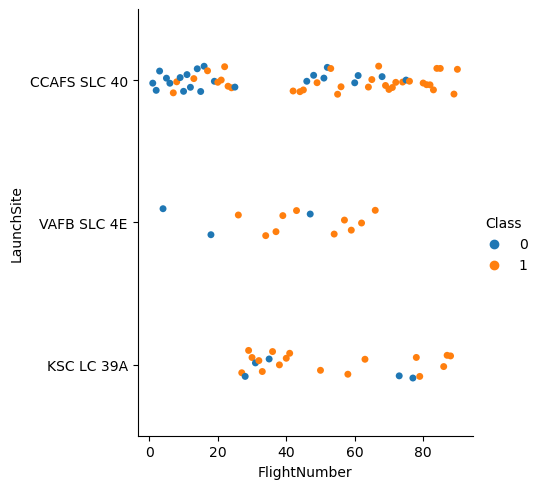

In [8]:
sns.catplot(
    x='FlightNumber',
    y='LaunchSite',
    hue="Class",
    data=df,
    kind='strip'  # You can use 'strip', 'swarm', etc., depending on your preference
)

# Display the plot
plt.show()

### TASK 2: Visualize the relationship between Payload Mass and Launch Site

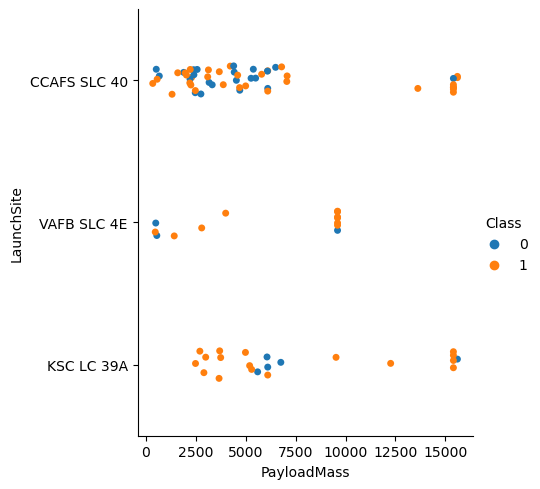

In [9]:
sns.catplot(
    x='PayloadMass',
    y='LaunchSite',
    hue="Class",
    data=df,
    kind='strip'  # You can use 'strip', 'swarm', etc., depending on your preference
)

# Display the plot
plt.show()

### TASK  3: Visualize the relationship between success rate of each orbit type


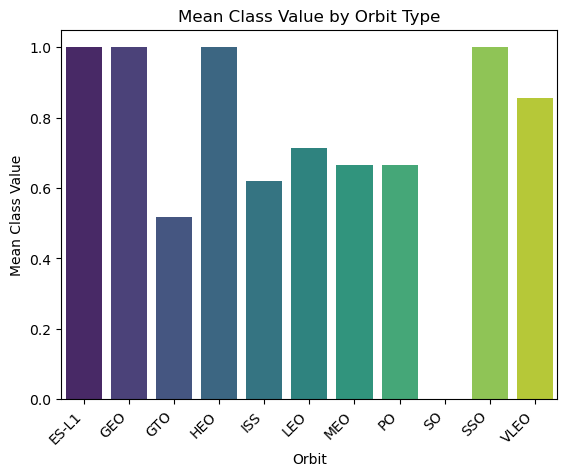

In [10]:
orbit_mean_class = df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(
    x='Orbit',
    y='Class',
    data=orbit_mean_class,
    palette='viridis'
)

# Add labels and title
plt.xlabel('Orbit')
plt.ylabel('Mean Class Value')
plt.title('Mean Class Value by Orbit Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

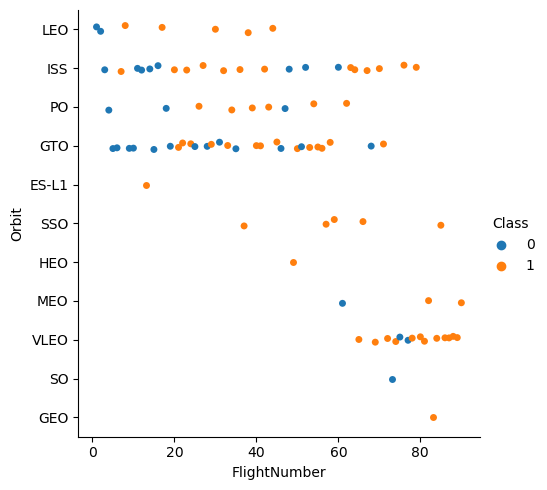

In [11]:
sns.catplot(
    x='FlightNumber',
    y='Orbit',
    hue="Class",
    data=df,
    kind='strip'  # You can use 'strip', 'swarm', etc., depending on your preference
)

# Display the plot
plt.show()

### TASK  5: Visualize the relationship between Payload Mass and Orbit type


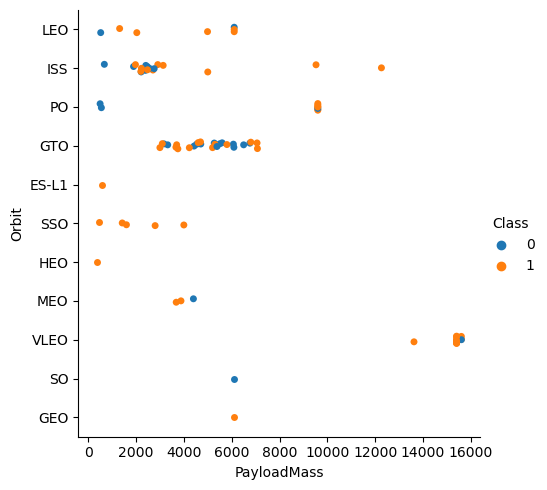

In [12]:
sns.catplot(
    x='PayloadMass',
    y='Orbit',
    hue="Class",
    data=df,
    kind='strip'  # You can use 'strip', 'swarm', etc., depending on your preference
)

# Display the plot
plt.show()

### TASK  6: Visualize the launch success yearly trend


In [13]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [14]:
df_year = df.groupby('Date')['Class'].mean().reset_index()

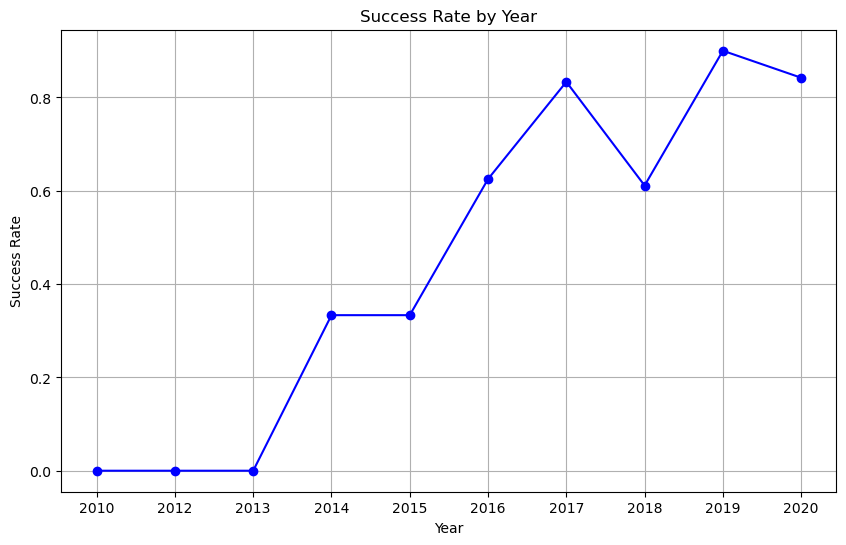

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df_year['Date'], df_year['Class'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Success Rate by Year')
plt.grid(True)

# Display the plot
plt.show()

In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


In [17]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

### TASK  8: Cast all numeric columns to `float64`


In [18]:
features_one_hot = features_one_hot.astype('float64')

In [19]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [20]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         